# HW1 - sklearn ml - development

* Nicholas Y. Abroo
* MIS 6900 - AAP
* Summer 24

Here are the libraries that we import.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [251]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn import tree

In [22]:
%matplotlib inline

Reading in the classification housing dataset.

In [25]:
housing_df = pd.read_csv("./data/kc_house_data_classification.csv")

In [27]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
 18  price_

In [29]:
housing_df.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_gt_1M
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
5,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1
6,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0
7,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,0
8,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,0
9,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,0


## Task 3 - EDA

### Using Sweetviz

In [33]:
import sweetviz

In [35]:
# report = sweetviz.analyze(housing_df)

In [37]:
# report.show_html("output/sweetviz_hw1report.html")

### Using Panda Profiling

In [40]:
# profile = ProfileReport(housing_df, title="Pandas Profiling Report")

In [42]:
# profile.to_file("output/pandas_profiling_report.html")

In [44]:
# profile

It seems that there is a small difference in the outputs that were generated. The Sweetviz report suggested that the variable `floors` was a categorical variable but the Pandas Profiling one dictated it as a numeric variable. For the purpose of this hw I will not dedicate `floors` as a categorical variable in my models.

## Task 4 - Categorical vs. Numeric

Here are the steps I took in order to do some data preprocessing continue the development of the models later in the hw file.

First lets see what the datatypes for are variables are.

In [50]:
housing_df.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price_gt_1M        int64
dtype: object

Since all of the variables will output as numeric, we will have to make sure what variables are numeric/categorical in out lists. 

Next, I will convert the following variables `view`, `waterfront`, and `condition` into categorical data using the following code.

In [54]:
housing_df["view"] = housing_df["view"].astype("category")
housing_df["waterfront"] = housing_df["waterfront"].astype("category")
housing_df["condition"] = housing_df["condition"].astype("category")

Here is the resulting output for the numeric and categorical variables:

In [57]:
categorical_cols = housing_df.select_dtypes(include=['category']).columns.tolist()
numeric_cols = housing_df.select_dtypes(include=['number']).columns.tolist()

In [59]:
categorical_cols

['waterfront', 'view', 'condition']

In [61]:
numeric_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'price_gt_1M']

We don't want to include `price_gt_1M` as that is our target variable. So lets remove it. 

In [63]:
numeric_cols = numeric_cols[:-1]
numeric_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [67]:
X = housing_df.iloc[:, 0:18]
y = housing_df.iloc[:, 18]

In [73]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  int64   
 1   bathrooms      21613 non-null  float64 
 2   sqft_living    21613 non-null  int64   
 3   sqft_lot       21613 non-null  int64   
 4   floors         21613 non-null  float64 
 5   waterfront     21613 non-null  category
 6   view           21613 non-null  category
 7   condition      21613 non-null  category
 8   grade          21613 non-null  int64   
 9   sqft_above     21613 non-null  int64   
 10  sqft_basement  21613 non-null  int64   
 11  yr_built       21613 non-null  int64   
 12  yr_renovated   21613 non-null  int64   
 13  zipcode        21613 non-null  int64   
 14  lat            21613 non-null  float64 
 15  long           21613 non-null  float64 
 16  sqft_living15  21613 non-null  int64   
 17  sqft_lot15     21613 non-null  

In [75]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21613 entries, 0 to 21612
Series name: price_gt_1M
Non-Null Count  Dtype
--------------  -----
21613 non-null  int64
dtypes: int64(1)
memory usage: 169.0 KB


## Task 4 - Logistic Regression models

### Pipeline for preprocessing

Here we are creating the pipline for preprocessing.

In [80]:
# using the StandardScaler and OneHotEncoder on our numeric and categorical transformer.
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [104]:
# Classifier model
clf_model = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=2000)

# Appending the classifier to preprocessing pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model)])

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Fit model on new training data
clf.fit(X_train, y_train)

print(f"Training score: {clf.score(X_train, y_train):.3f}")
print(f"Test score: {clf.score(X_test, y_test):.3f}")

Training score: 0.962
Test score: 0.960


C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### Model 0

In [91]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [93]:
dummy_clf.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [95]:
dummy_clf.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [97]:
dummy_clf.score(X, y)

0.9309674732799704

So the fit of the null model using the DummyClassifier is 0.93

#### Model 1

In [120]:
# Ridge Regression
clf_model_ridge = LogisticRegression(penalty='l2', C=1.0, solver='saga', max_iter=2000)

In [122]:
# Appending classifier to preprocessing pipeline.
clf_model1 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_ridge)])

In [124]:
# Fitting model on training data 
clf_model1.fit(X_train, y_train)

# Output statement
print(f"Training score: {clf_model1.score(X_train, y_train):.3f}")
print(f"Test score: {clf_model1.score(X_test, y_test):.3f}")

Training score: 0.962
Test score: 0.960


C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Here is our Confusion Matrix for our Train and Test set.

##### Confusion Matrix - M1, Train

Confusion matrix for train
[[15935   192]
 [  469   694]]
Normalized confusion matrix for train
[[0.9880945  0.0119055 ]
 [0.40326741 0.59673259]]


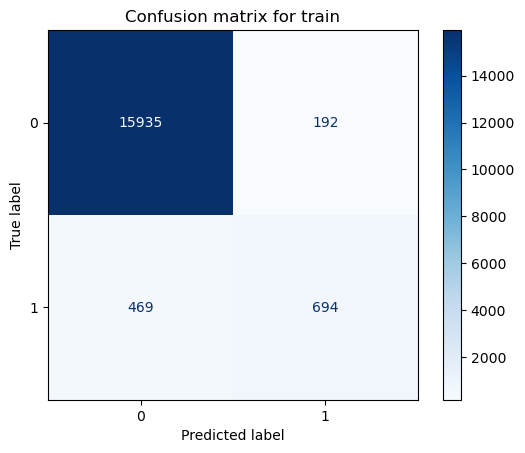

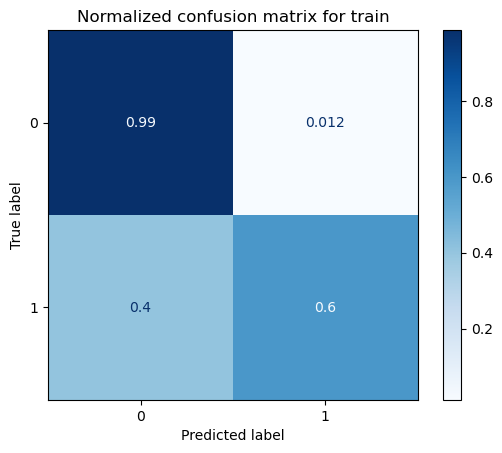

In [160]:
titles_options = [("Confusion matrix for train", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_model1['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_model1, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

##### Confusion Matrix - M1, Test

Confusion matrix for Test
[[3946   48]
 [ 127  202]]
Normalized confusion matrix for Test
[[0.98798197 0.01201803]
 [0.38601824 0.61398176]]


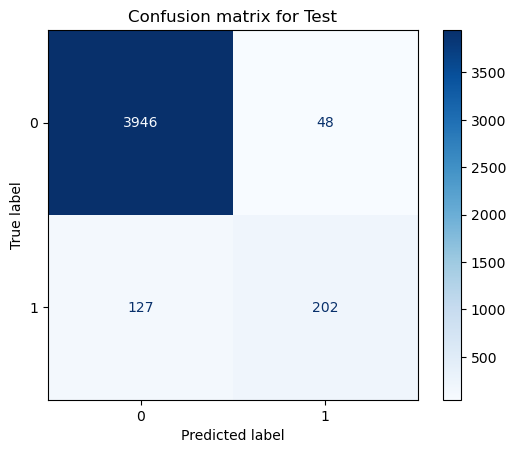

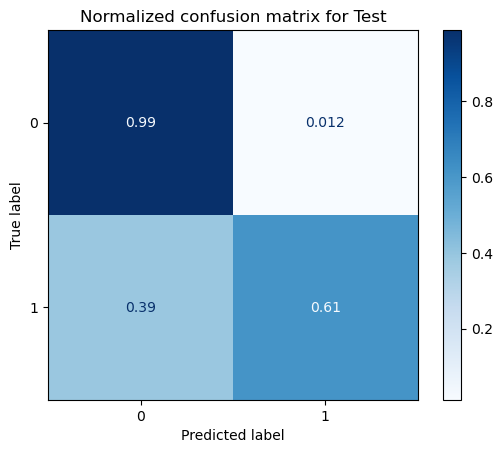

In [162]:
titles_options = [("Confusion matrix for Test", None),
                  ("Normalized confusion matrix for Test", 'true')]

class_names = clf_model1['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_model1, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

##### Coefficient Plot - M1

In [135]:
clf.named_steps['classifier'].coef_.shape

(1, 27)

In [137]:
clf_model1.steps[1]

('classifier', LogisticRegression(max_iter=2000, solver='saga'))

In [139]:
def coef_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
       
    if title:
        ax[0].set_title(title)

    for i in range(1):
        ax[i].plot(model.steps[1][1].coef_[i])

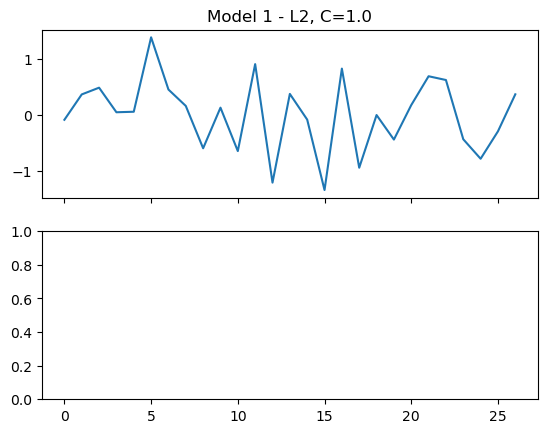

In [141]:
coef_plot(clf_model1, 'Model 1 - L2, C=1.0')

#### Model 2

In [144]:
# Lasso Regression, C = 1.0
clf_model2_lasso = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=2000)

# Appending classifier to preprocessing pipeline.
clf_model2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model2_lasso)])

# Fitting model on training data 
clf_model2.fit(X_train, y_train)

# Output statement
print(f"Training score: {clf_model2.score(X_train, y_train):.3f}")
print(f"Test score: {clf_model2.score(X_test, y_test):.3f}")

Training score: 0.962
Test score: 0.960


##### CM - M2, Train

Confusion matrix for train
[[15933   194]
 [  471   692]]
Normalized confusion matrix for train
[[0.98797048 0.01202952]
 [0.4049871  0.5950129 ]]


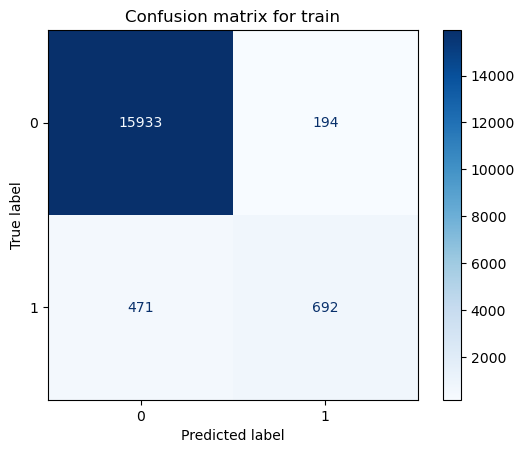

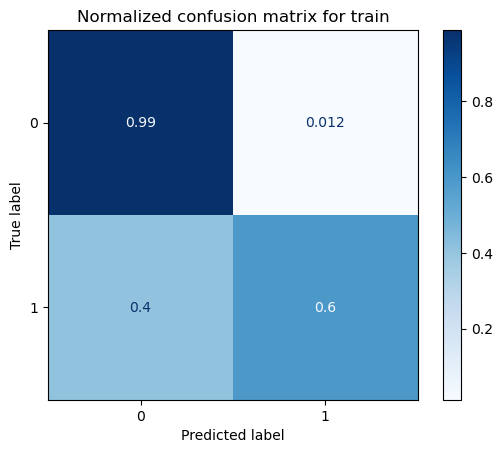

In [164]:
titles_options = [("Confusion matrix for train", None),
                  ("Normalized confusion matrix for train", 'true')]

class_names = clf_model2['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_model2, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

##### CM - M2, Test

Confusion matrix for Test
[[3946   48]
 [ 127  202]]
Normalized confusion matrix for Test
[[0.98798197 0.01201803]
 [0.38601824 0.61398176]]


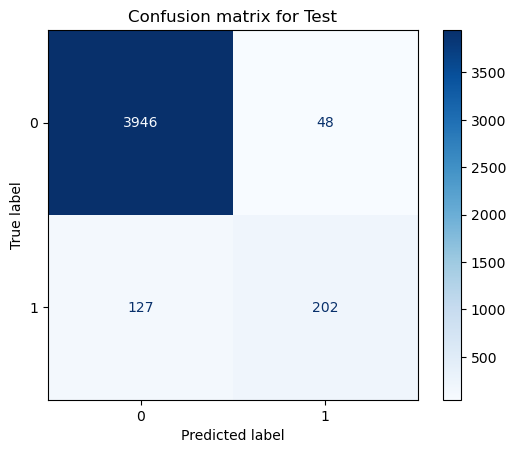

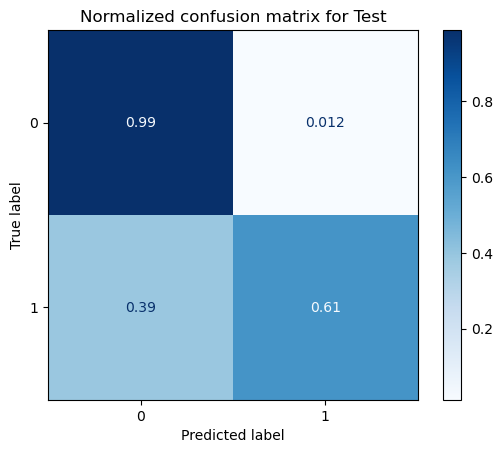

In [168]:
titles_options = [("Confusion matrix for Test", None),
                  ("Normalized confusion matrix for Test", 'true')]

class_names = clf_model2['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_model2, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

##### Coefficient Plot

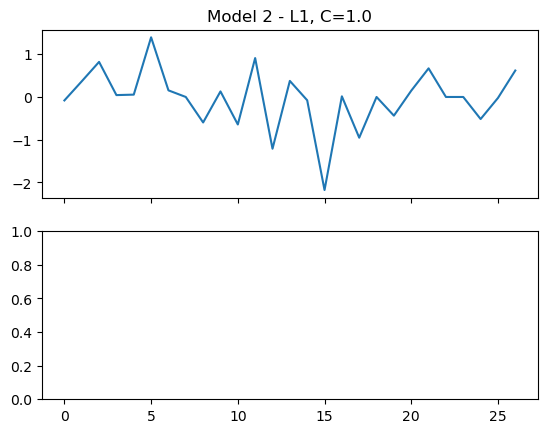

In [171]:
coef_plot(clf_model2, 'Model 2 - L1, C=1.0')

In [158]:
# Comparison code chuck of Model 1 and 2 scores
print(f"M1 - Training score: {clf_model1.score(X_train, y_train):.3f}")
print(f"M1 - Test score: {clf_model1.score(X_test, y_test):.3f}")

print(f"M2 - Training score: {clf_model2.score(X_train, y_train):.3f}")
print(f"M2 - Test score: {clf_model2.score(X_test, y_test):.3f}")

M1 - Training score: 0.962
M1 - Test score: 0.960
M2 - Training score: 0.962
M2 - Test score: 0.960


**Explaination and comparison of Models 1 to 2:** After running the analysis using the Ridge and Lasso Regression, it seems that both models had the same score. Looking closely at the confusion matrix, there isn't a big difference in the visuals.

#### Model 3

In [180]:
# Lasso Regression, C = 0.01
clf_model3_lasso = LogisticRegression(penalty='l1', C=0.01, solver='saga', max_iter=2000)

# Appending classifier to preprocessing pipeline.
clf_model3 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model3_lasso)])

# Fitting model on training data 
clf_model3.fit(X_train, y_train)

# Output statement
print(f"Training score: {clf_model3.score(X_train, y_train):.3f}")
print(f"Test score: {clf_model3.score(X_test, y_test):.3f}")

Training score: 0.957
Test score: 0.954


##### CM - M3, Train

Confusion matrix for Train
[[15996   131]
 [  618   545]]
Normalized confusion matrix for Train
[[0.99187698 0.00812302]
 [0.53138435 0.46861565]]


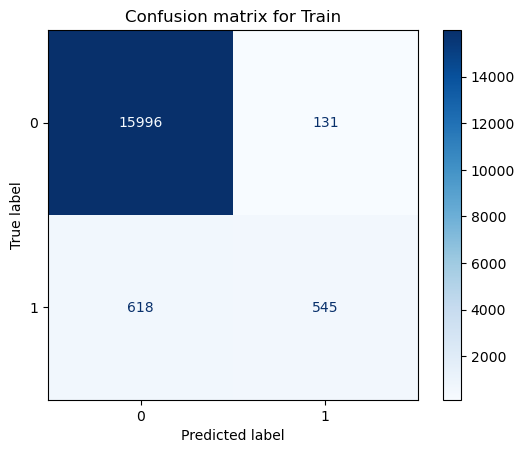

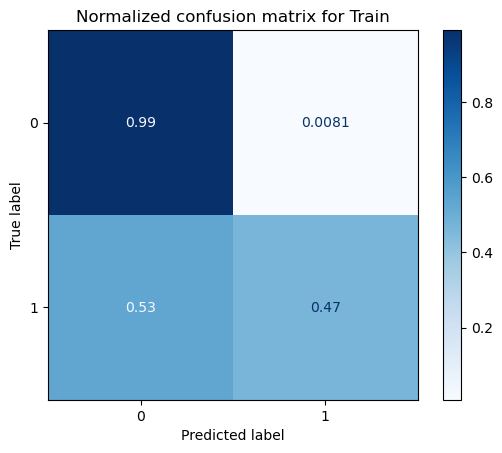

In [187]:
titles_options = [("Confusion matrix for Train", None),
                  ("Normalized confusion matrix for Train", 'true')]

class_names = clf_model3['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_model3, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

##### CM - M3, Test

Confusion matrix for Test
[[3958   36]
 [ 162  167]]
Normalized confusion matrix for Test
[[0.99098648 0.00901352]
 [0.49240122 0.50759878]]


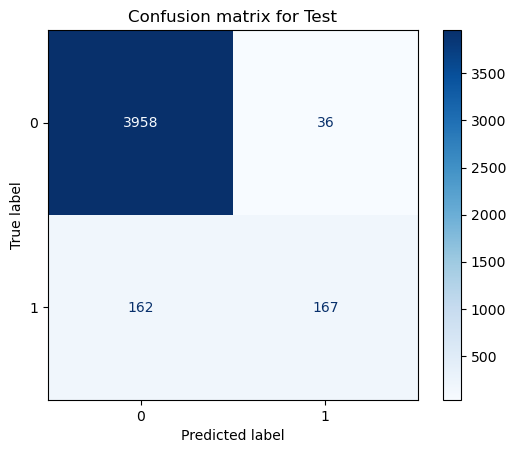

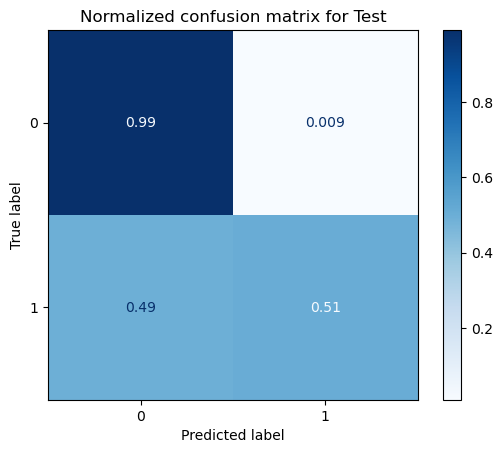

In [189]:
titles_options = [("Confusion matrix for Test", None),
                  ("Normalized confusion matrix for Test", 'true')]

class_names = clf_model3['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_model3, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

##### Coefficient Plot

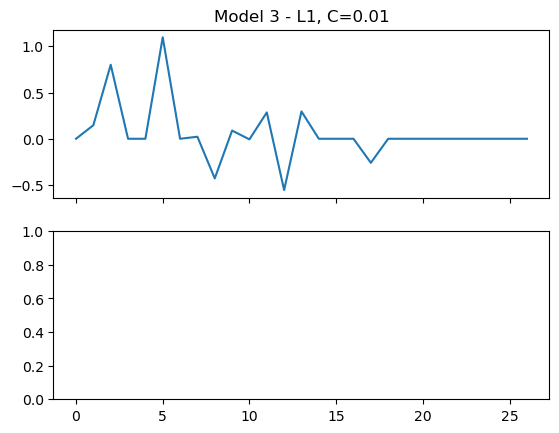

In [192]:
coef_plot(clf_model3, 'Model 3 - L1, C=0.01')

In [199]:
# Comparison code chuck of Model 3 to Model 1 and 2 scores
print(f"M1 - Training score: {clf_model1.score(X_train, y_train):.3f}")
print(f"M1 - Test score: {clf_model1.score(X_test, y_test):.3f}")

print(f"M2 - Training score: {clf_model2.score(X_train, y_train):.3f}")
print(f"M2 - Test score: {clf_model2.score(X_test, y_test):.3f}")

print(f"M3 - Training score: {clf_model3.score(X_train, y_train):.3f}")
print(f"M3 - Test score: {clf_model3.score(X_test, y_test):.3f}")

M1 - Training score: 0.962
M1 - Test score: 0.960
M2 - Training score: 0.962
M2 - Test score: 0.960
M3 - Training score: 0.957
M3 - Test score: 0.954


**Explaination and comparison of Models 3 to 1 and 2:** Models 1 and 2 have less regularization as $C$ is a high number used to fit the coefficients. I think the reason why they are different is because of our $C$ value. Even though there isnt a big significance between the Training and Test set but it's still worth to note.

#### Model 4

In [201]:
l1_ratios = list(np.linspace(0, 1, 5))

for penalty in ['l1', 'l2', 'elasticnet']:
    
    # LR, Optimal C value
    clf_model4_cv = LogisticRegressionCV(penalty=penalty, Cs=[0.1, 1, 10], l1_ratios=l1_ratios, solver='saga', max_iter=2000)

    # Appending classifier to preprocessing pipeline.
    clf_model4 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', clf_model4_cv)])

    # Fitting model on training data 
    clf_model4.fit(X_train, y_train)
    print(f"Best model score for {penalty} : {clf_model4['classifier'].scores_}")

# Output statement
print(f"Training score: {clf_model4.score(X_train, y_train):.3f}")
print(f"Test score: {clf_model4.score(X_test, y_test):.3f}")

C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_logistic.py:1796: UserWarning: l1_ratios parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best model score for l1 : {1: array([[[0.96500868],
        [0.96356275],
        [0.9626952 ]],

       [[0.96067091],
        [0.96038172],
        [0.96038172]],

       [[0.96153846],
        [0.96182765],
        [0.96211683]],

       [[0.95951417],
        [0.96009254],
        [0.95980335]],

       [[0.96009254],
        [0.96009254],
        [0.95980335]]])}


C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_logistic.py:1796: UserWarning: l1_ratios parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best model score for l2 : {1: array([[[0.96414112],
        [0.96298438],
        [0.9626952 ]],

       [[0.96067091],
        [0.96009254],
        [0.96038172]],

       [[0.96211683],
        [0.96182765],
        [0.96211683]],

       [[0.95980335],
        [0.96009254],
        [0.95980335]],

       [[0.96009254],
        [0.96009254],
        [0.95980335]]])}


C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\22nic\anaconda3\envs\aap\Lib\site-packages\sklearn\linea

Best model score for elasticnet : {1: array([[[0.96414112, 0.96529786, 0.96471949, 0.96471949, 0.96500868],
        [0.96298438, 0.96298438, 0.96327357, 0.96356275, 0.96356275],
        [0.9626952 , 0.9626952 , 0.9626952 , 0.9626952 , 0.9626952 ]],

       [[0.96067091, 0.96038172, 0.96067091, 0.96038172, 0.96067091],
        [0.96009254, 0.96038172, 0.96038172, 0.96038172, 0.96038172],
        [0.96038172, 0.96038172, 0.96038172, 0.96038172, 0.96038172]],

       [[0.96211683, 0.96182765, 0.96182765, 0.96153846, 0.96153846],
        [0.96182765, 0.96182765, 0.96182765, 0.96182765, 0.96182765],
        [0.96211683, 0.96211683, 0.96211683, 0.96211683, 0.96211683]],

       [[0.95980335, 0.95951417, 0.95951417, 0.9589358 , 0.95951417],
        [0.96009254, 0.95980335, 0.96009254, 0.96009254, 0.96009254],
        [0.95980335, 0.95980335, 0.95980335, 0.95980335, 0.95980335]],

       [[0.96009254, 0.96038172, 0.96009254, 0.96009254, 0.96009254],
        [0.96009254, 0.96009254, 0.96009254,

##### CM - M4, Train

Confusion matrix for Train
[[15948   179]
 [  484   679]]
Normalized confusion matrix for Train
[[0.9889006  0.0110994 ]
 [0.41616509 0.58383491]]


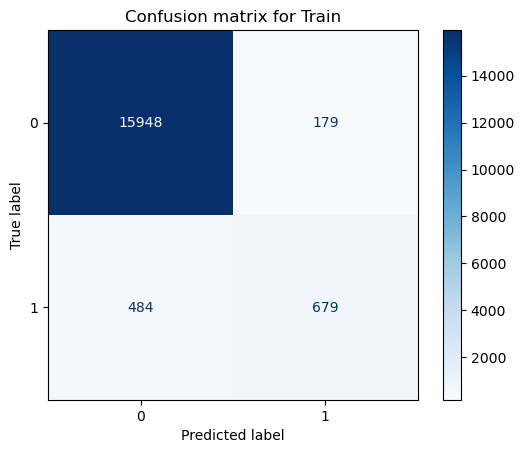

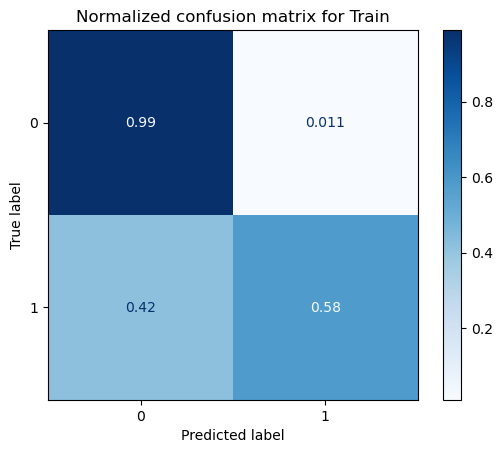

In [205]:
titles_options = [("Confusion matrix for Train", None),
                  ("Normalized confusion matrix for Train", 'true')]

class_names = clf_model4['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_model4, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

##### CM - M4, Test

Confusion matrix for Test
[[3948   46]
 [ 129  200]]
Normalized confusion matrix for Test
[[0.98848272 0.01151728]
 [0.39209726 0.60790274]]


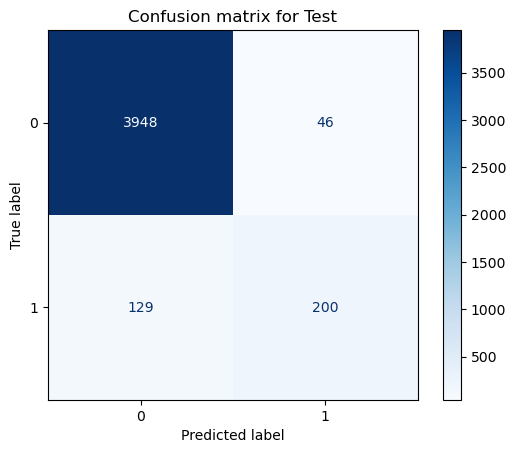

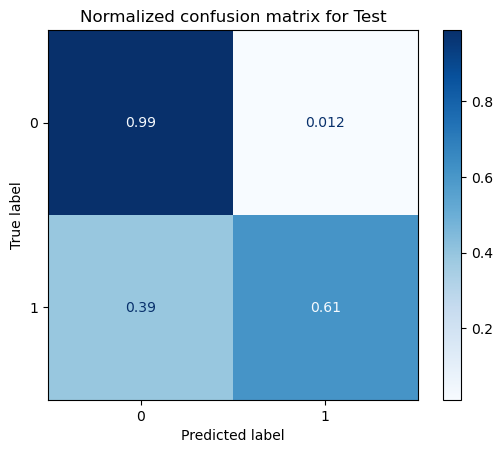

In [208]:
titles_options = [("Confusion matrix for Test", None),
                  ("Normalized confusion matrix for Test", 'true')]

class_names = clf_model4['classifier'].classes_

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(clf_model4, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

**Explaination and Answer:** I'm not sure why the models are running so long. After running the model, Model 4 gives the exact same output scoring for Models 1 and 2. The confusion matrix also scored similarly. Well it looks like it did help but it gave the same scores as Models 1 and 2.

### Task 5 - Decision Tree

In [232]:
# Create a DecisionTreeClassifier model. 
tree_task5 = DecisionTreeClassifier(min_samples_split=20)

# Fit the model using our features and target variables
tree_task5.fit(X_train, y_train)

# Get % accuracy on the training data
# Output statement
print(f"Training score: {tree_task5.score(X_train, y_train):.3f}")
print(f"Test score: {tree_task5.score(X_test, y_test):.3f}")

Training score: 0.984
Test score: 0.962


In [234]:
# Making prediction
tree_testclasses = tree_task5.predict(X_test)
print(tree_testclasses[:10])

# Class probabilities - just the first three rows and first 15 cols
tree_testprobs = tree_task5.predict_proba(X_test)
tree_testprobs[:3, :2]

[0 0 0 0 0 0 0 0 0 0]


array([[1., 0.],
       [1., 0.],
       [1., 0.]])

##### CM - DecisionTree, Train

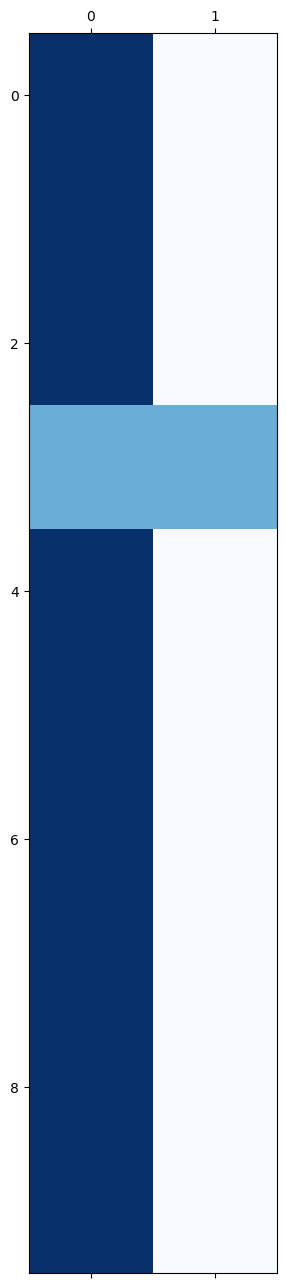

In [237]:
plt.matshow(tree_testprobs[:10, :10], cmap='Blues')
plt.show()

##### Display DecisionTree

[Text(0.6474404501748252, 0.975, 'x[8] <= 9.5\ngini = 0.125\nsamples = 17290\nvalue = [16127, 1163]'),
 Text(0.45652134324009325, 0.925, 'x[2] <= 2855.0\ngini = 0.061\nsamples = 16012\nvalue = [15510, 502]'),
 Text(0.32140515734265734, 0.875, 'x[16] <= 2835.0\ngini = 0.028\nsamples = 14197\nvalue = [13999, 198]'),
 Text(0.26169143356643354, 0.825, 'x[5] <= 0.5\ngini = 0.02\nsamples = 13839\nvalue = [13702, 137]'),
 Text(0.1970425407925408, 0.775, 'x[8] <= 8.5\ngini = 0.017\nsamples = 13783\nvalue = [13662, 121]'),
 Text(0.12485431235431235, 0.725, 'x[16] <= 2279.5\ngini = 0.009\nsamples = 12873\nvalue = [12813, 60]'),
 Text(0.08537296037296037, 0.675, 'x[1] <= 2.625\ngini = 0.005\nsamples = 11407\nvalue = [11381, 26]'),
 Text(0.05652680652680653, 0.625, 'x[9] <= 2408.0\ngini = 0.003\nsamples = 10614\nvalue = [10599, 15]'),
 Text(0.04079254079254079, 0.575, 'x[16] <= 2175.0\ngini = 0.002\nsamples = 10443\nvalue = [10431, 12]'),
 Text(0.023310023310023312, 0.525, 'x[16] <= 1905.0\ngini =

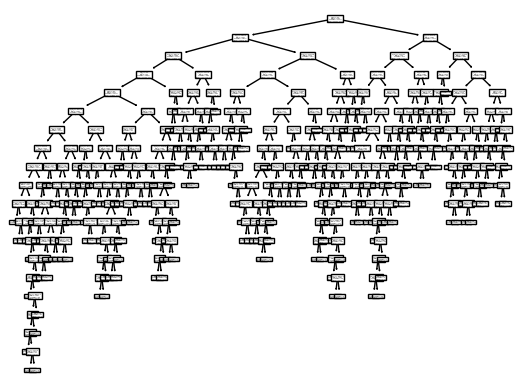

In [243]:
# Sorry for the long output
tree.plot_tree(tree_task5)

In [245]:
print(f"Training score: {tree_task5.score(X_train, y_train):.3f}")
print(f"Test score: {tree_task5.score(X_test, y_test):.3f}")

Training score: 0.984
Test score: 0.962


**Explaination and Discussion:** After running the DecisionTree here is my conclusion. The Tree ran a better performance out of the LogisticRegression models that were created previously. 

### Task 6 - Error Exploration

In [275]:
housing_df_reg = pd.read_csv("./data/kc_house_data_regression.csv")

In [277]:
housing_df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  price          21613 non-null  float64
dtypes: flo

In [283]:
housing_df_reg["view"] = housing_df_reg["view"].astype("category")
housing_df_reg["waterfront"] = housing_df_reg["waterfront"].astype("category")
housing_df_reg["condition"] = housing_df_reg["condition"].astype("category")

categorical_cols_reg = housing_df_reg.select_dtypes(include=['category']).columns.tolist()
numeric_cols_reg = housing_df_reg.select_dtypes(include=['number']).columns.tolist()

numeric_cols_reg = numeric_cols_reg[:-1]
numeric_cols_reg

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15']

In [293]:
X_reg = housing_df_reg.iloc[:, 0:18]
y_reg = housing_df_reg.iloc[:, 18]

IndexError: single positional indexer is out-of-bounds

In [295]:
# Classifier model
clf_task6_lasso = LogisticRegression(penalty='l1', C=1.0, solver='saga', max_iter=2000)

# Append classifier to preprocessing pipeline.
clf_task6 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_task6_lasso)])

# Fit model on training data 
clf_task6.fit(X_train, y_train)

print(f"Training score: {clf_task6.score(X_train, y_train):.3f}")
print(f"Test score: {clf_task6.score(X_test, y_test):.3f}")


# Make predictions on the test data
clf_task6_predictions = clf_task6.predict(X_test)
print(clf_task6_predictions[:10])

Training score: 0.962
Test score: 0.960
[0 0 0 0 0 0 0 0 0 0]


In [247]:
print(f"M1 - Training score: {clf_model1.score(X_train, y_train):.3f}")
print(f"M2 - Training score: {clf_model2.score(X_train, y_train):.3f}")
print(f"M3 - Training score: {clf_model3.score(X_train, y_train):.3f}")
print(f"M4 - Training score: {clf_model4.score(X_train, y_train):.3f}")
print(f"T5 - Training score: {tree_task5.score(X_train, y_train):.3f}")

print(f"M1 - Test score: {clf_model1.score(X_test, y_test):.3f}")
print(f"M2 - Test score: {clf_model2.score(X_test, y_test):.3f}")
print(f"M3 - Test score: {clf_model3.score(X_test, y_test):.3f}")
print(f"M4 - Test score: {clf_model4.score(X_test, y_test):.3f}")
print(f"T5 - Test score: {tree_task5.score(X_test, y_test):.3f}")

M1 - Training score: 0.962
M2 - Training score: 0.962
M3 - Training score: 0.957
M4 - Training score: 0.962
T5 - Training score: 0.984
M1 - Test score: 0.960
M2 - Test score: 0.960
M3 - Test score: 0.954
M4 - Test score: 0.960
T5 - Test score: 0.962


## Hacker Extra Credit Attempt

In [253]:
target_col = ['price_gt_1M']

In [255]:
categorical_cols

['waterfront', 'view', 'condition']

In [268]:
numeric_transformer_hgbc = StandardScaler()
categorical_transformer_hgbc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
target_transformer_hgbc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

# Passing in the HGBC preprocessor using the pipeline.
preprocessor_hgbc = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer_hgbc, categorical_cols),
        ('num', numeric_transformer_hgbc, numeric_cols)],
        remainder='passthrough')

categorical_cols_idx = [_ for _ in range(len(categorical_cols))]

# Appending the classifier to preprocessing pipeline.
clf_hgbc = Pipeline(steps=[('preprocessor', preprocessor_hgbc),
                      ('classifier', HistGradientBoostingClassifier(categorical_features=categorical_cols_idx))])

# Fit model
clf_hgbc.fit(X_train, y_train)
print(f"HGBC Training score: {clf_hgbc.score(X_train, y_train):.3f}")
print(f"HGBC Test score: {clf_hgbc.score(X_test, y_test):.3f}")

clf_hgbc_test = clf_hgbc.predict(X_test)

HGBC Training score: 0.996
HGBC Test score: 0.975


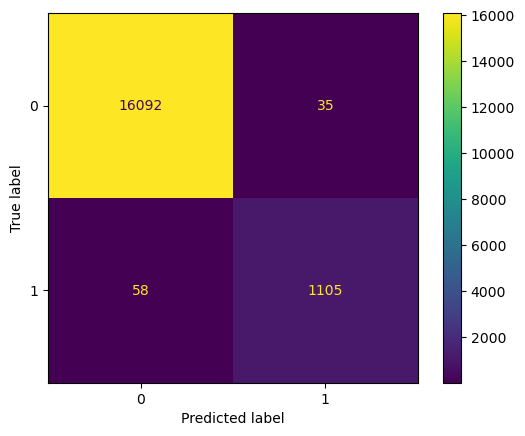

In [265]:
ConfusionMatrixDisplay.from_estimator(clf_hgbc, X_train, y_train, labels=clf_hgbc['classifier'].classes_)

**Explaination and Answer:** Well it seems like HGBC did better than the logistic regression model with the Train and Test.